In [160]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration.DataExploration import *
from utils import *
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [161]:
      # read csv file as df
df = pd.read_csv('../../Dataset/monthly-sales.csv')
df.head()   

,Month,Monthly Sales
0,2008-01,154000
1,2008-02,96000
2,2008-03,73000
3,2008-04,51000
4,2008-05,53000


In [162]:
#print all unique values in the column
print(df['Month'].unique())

['2008-01' '2008-02' '2008-03' '2008-04' '2008-05' '2008-06' '2008-07'
 '2008-08' '2008-09' '2008-10' '2008-11' '2008-12' '2009-01' '2009-02'
 '2009-03' '2009-04' '2009-05' '2009-06' '2009-07' '2009-08' '2009-09'
 '2009-10' '2009-11' '2009-12' '2010-01' '2010-02' '2010-03' '2010-04'
 '2010-05' '2010-06' '2010-07' '2010-08' '2010-09' '2010-10' '2010-11'
 '2010-12' '2011-01' '2011-02' '2011-03' '2011-04' '2011-05' '2011-06'
 '2011-07' '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-01'
 '2012-02' '2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08'
 '2012-09' '2012-10' '2012-11' '2012-12' '2013-01' '2013-02' '2013-03'
 '2013-04' '2013-05' '2013-06' '2013-07' '2013-08' '2013-09']


In [163]:
#keep only 0.5 data
df = df.sample(frac=0.4, random_state=1)


In [164]:
# df['Month'] = pd.to_datetime(df['Month'])
# df['Month'] = df['Month'].dt.strftime('%Y-%m')

In [165]:
print(df['Month'].unique())

['2013-04' '2010-08' '2010-03' '2011-01' '2013-06' '2011-12' '2010-12'
 '2012-09' '2012-02' '2008-03' '2011-03' '2012-01' '2010-11' '2012-06'
 '2010-04' '2013-02' '2012-04' '2012-05' '2011-11' '2011-09' '2010-10'
 '2009-10' '2012-11' '2008-04' '2012-07' '2011-08' '2012-10' '2008-11']


In [166]:
# make index  is Month
df.index = df['Month']

                               SARIMAX Results                                
Dep. Variable:          Monthly Sales   No. Observations:                   28
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -356.637
Date:                Mon, 15 May 2023   AIC                            719.273
Time:                        09:57:37   BIC                            723.047
Sample:                             0   HQIC                           720.360
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4445      0.229      1.939      0.052      -0.005       0.894
ar.L2          0.4554      0.267      1.708      0.088      -0.067       0.978
sigma2      4.806e+10   2.93e-12   1.64e+22      0.0

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic 

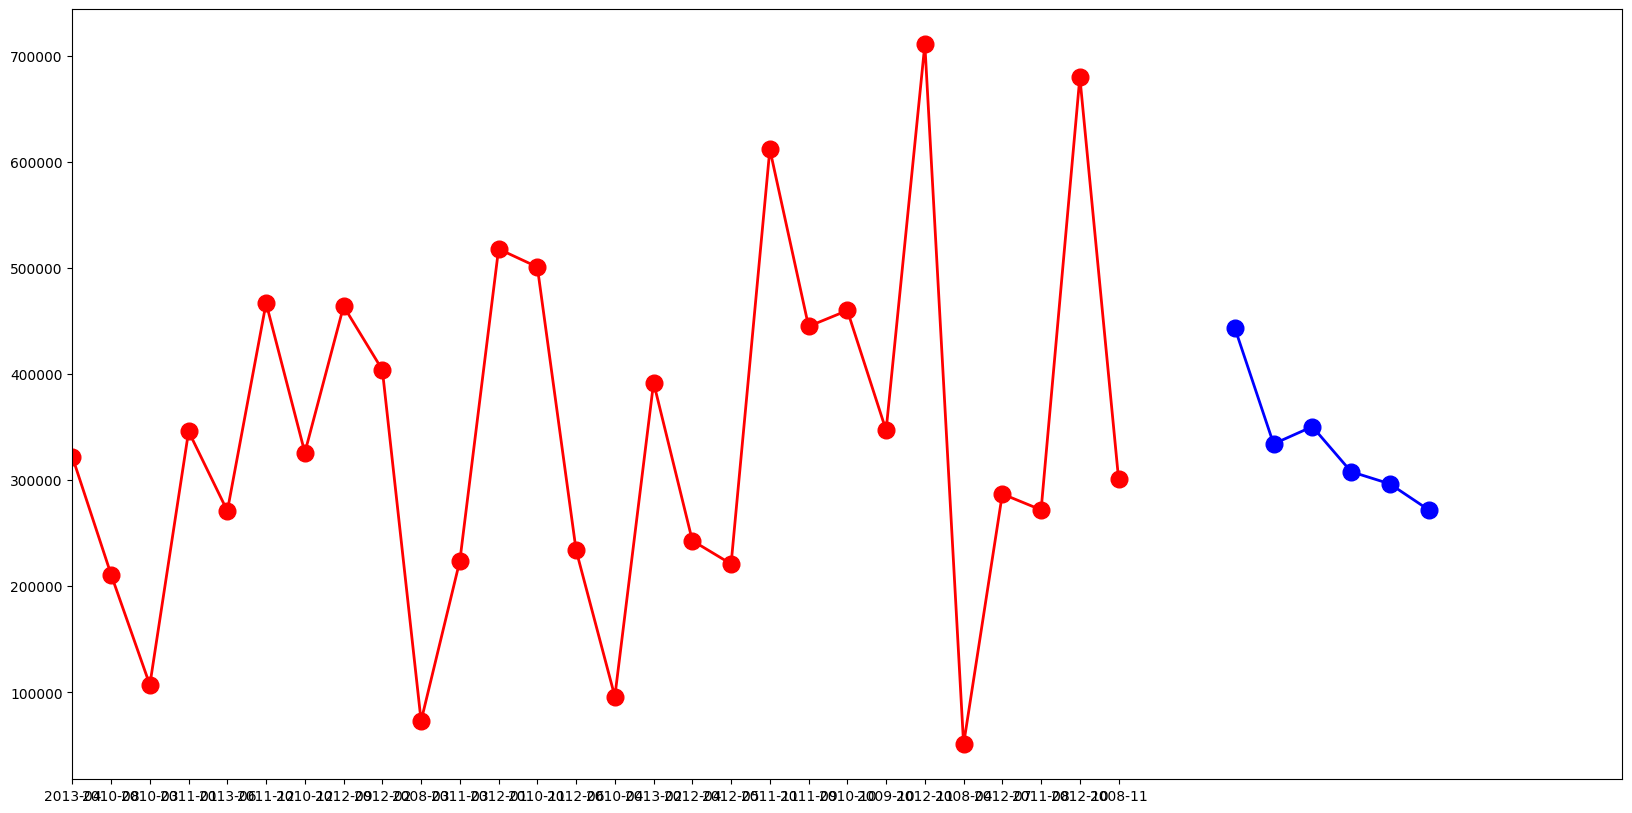

In [167]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


steps_to_predict = 6

model = sm.tsa.statespace.SARIMAX(endog=df['Monthly Sales'],order=(2,0,0),enforce_stationarity=False)
sarima = model.fit()
print(sarima.summary())
# type label for each color in the plot using legend
plt.legend(['Monthly Sales', 'Predicted Sales'])



# plot   
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_xlim(0,40)
ax.plot(df['Monthly Sales'], "ro-", linewidth=2, markersize=12)
ax.plot(list(range(30,36)), sarima.forecast(steps_to_predict), "bo-", linewidth=2, markersize=12)